# CP1 Blatt9 Abgabe Lapp & Brieden
## erstellt von Tobias Lapp und Sven Brieden am 16.01.2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.constants as constants
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 14

## Aufgabe 9.1 Radiation in the visible
$$u(ν, T)  = \dfrac{2hν^3}{c^2} \dfrac{1}{exp(hν/k_BT)-1}$$

$$λ=\dfrac{c}{ν}$$

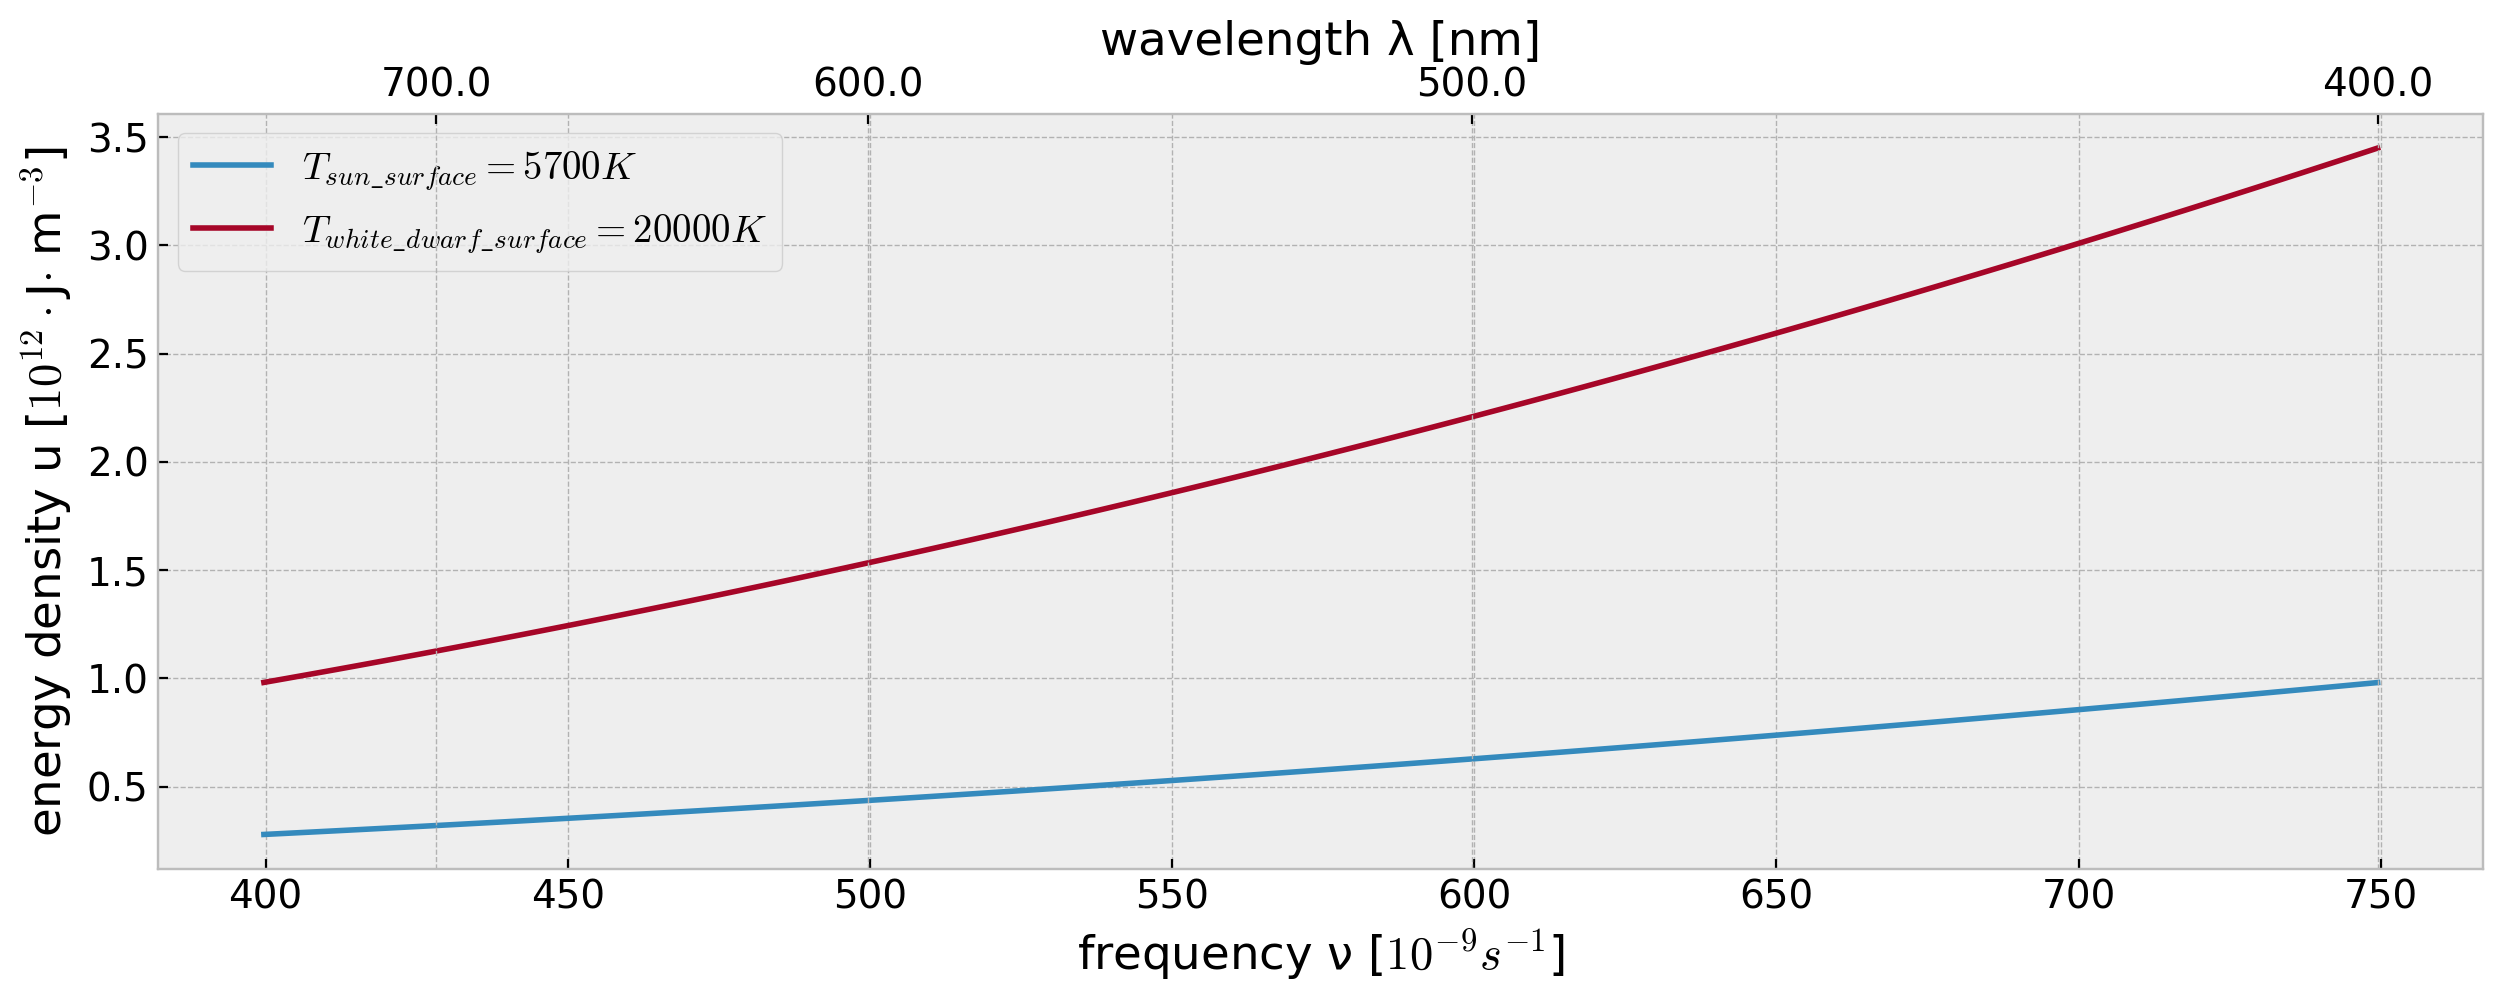

In [2]:
u  = lambda ν, T:  2 * h * ν**3 / c**2 * 1 / (np.exp( h * ν / (k_B * T)) - 1)

h = constants.h
c = constants.c
k_B = constants.Boltzmann

λ = np.linspace(400e-6, 750e-6,100)
ν = c/λ
u_5700 = u(ν, 5700)
u_20000 = u(ν, 20000)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ν * 1e-9, u_5700 * 1e12, label= "$T_{sun\_surface}= 5700K$")
ax1.plot(ν * 1e-9, u_20000 * 1e12, label= "$T_{white\_dwarf\_surface}= 20000K$")
ax1.set_ylabel("energy density u [$10^{12}\cdot$J$\cdot$ m$^{-3}$]"),ax1.set_xlabel("frequency ν [$10^{-9}s^{-1}$]"), ax1.legend(), 
ax2 = ax1.twiny()
freq = np.array([4e5, 5e5, 6e5, 7e5])
ax2.set_xlim(ax1.get_xlim()), ax2.set_xticks([c/λ for λ in freq]), ax2.set_xticklabels(freq*1e-3), ax2.set_xlabel("wavelength λ [nm]")
plt.show()

## 9.2 Period of oscillation
$$
T= \sqrt{2m}\int_{x_-}^{x_+} \! \dfrac{\mathrm{d}x}{\sqrt{E-V(x)}}
$$

$$
V(x) = \frac{V_0}{\mathrm{cos}(x)}
$$

$$
E = V(x_{\pm}) = \frac{V_0}{\mathrm{cos}(x_{\pm})} \\	\Rightarrow
x = -x_- = x_+ = \mathrm{arccos}(\frac{V_0}{E})
$$

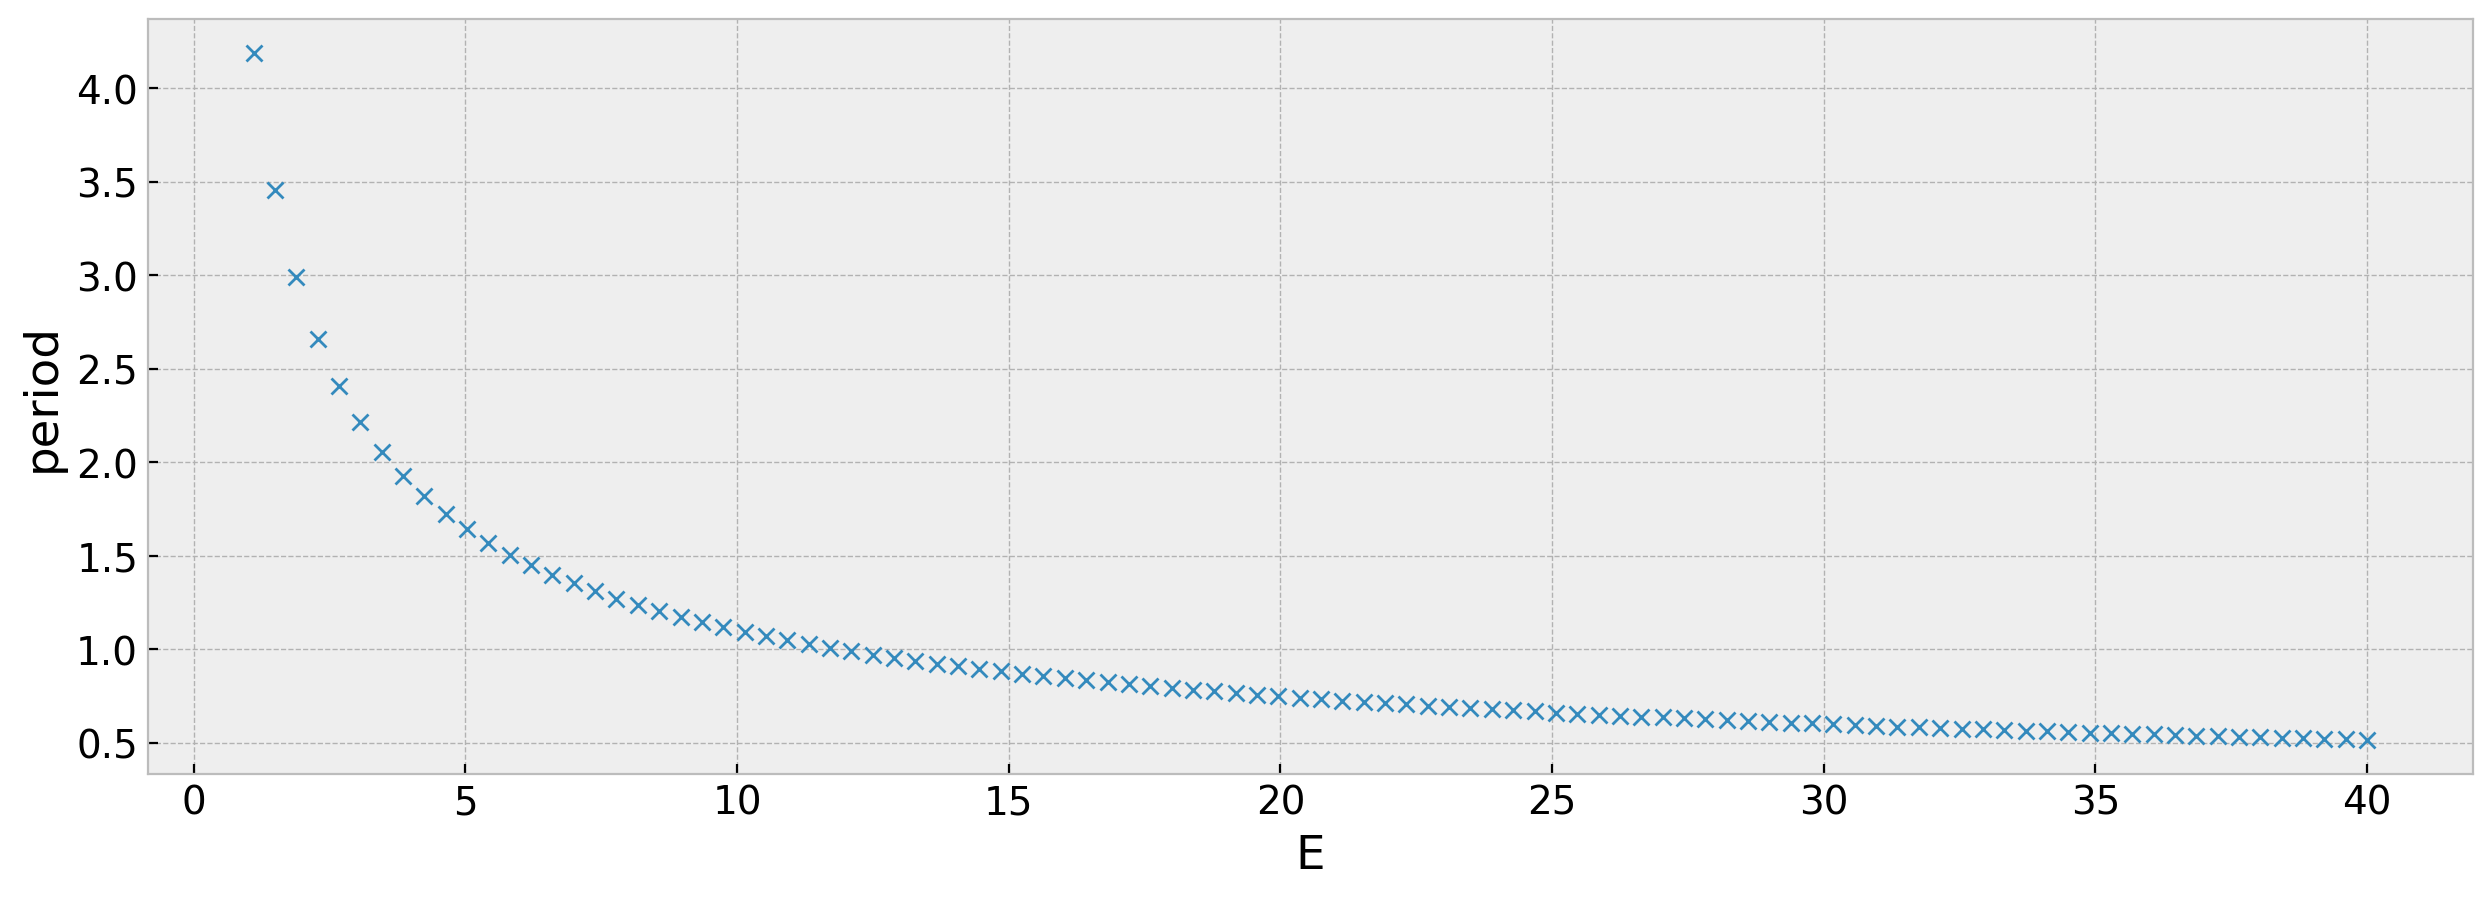

In [3]:
V_0, m = 1, 0.5
V = lambda x: V_0/np.cos(x)
T = lambda E: np.sqrt(2*m) *integrate.quad(lambda x: 1/np.sqrt(E-V(x)), -np.arccos(V_0/E),np.arccos(V_0/E))[0]

for e in np.linspace(1.1,40,100):
    plt.plot(e, T(e), "x", c="C0")
plt.xlabel("E"), plt.ylabel("period")
plt.show()

## 9.3 Asymptotic expansion

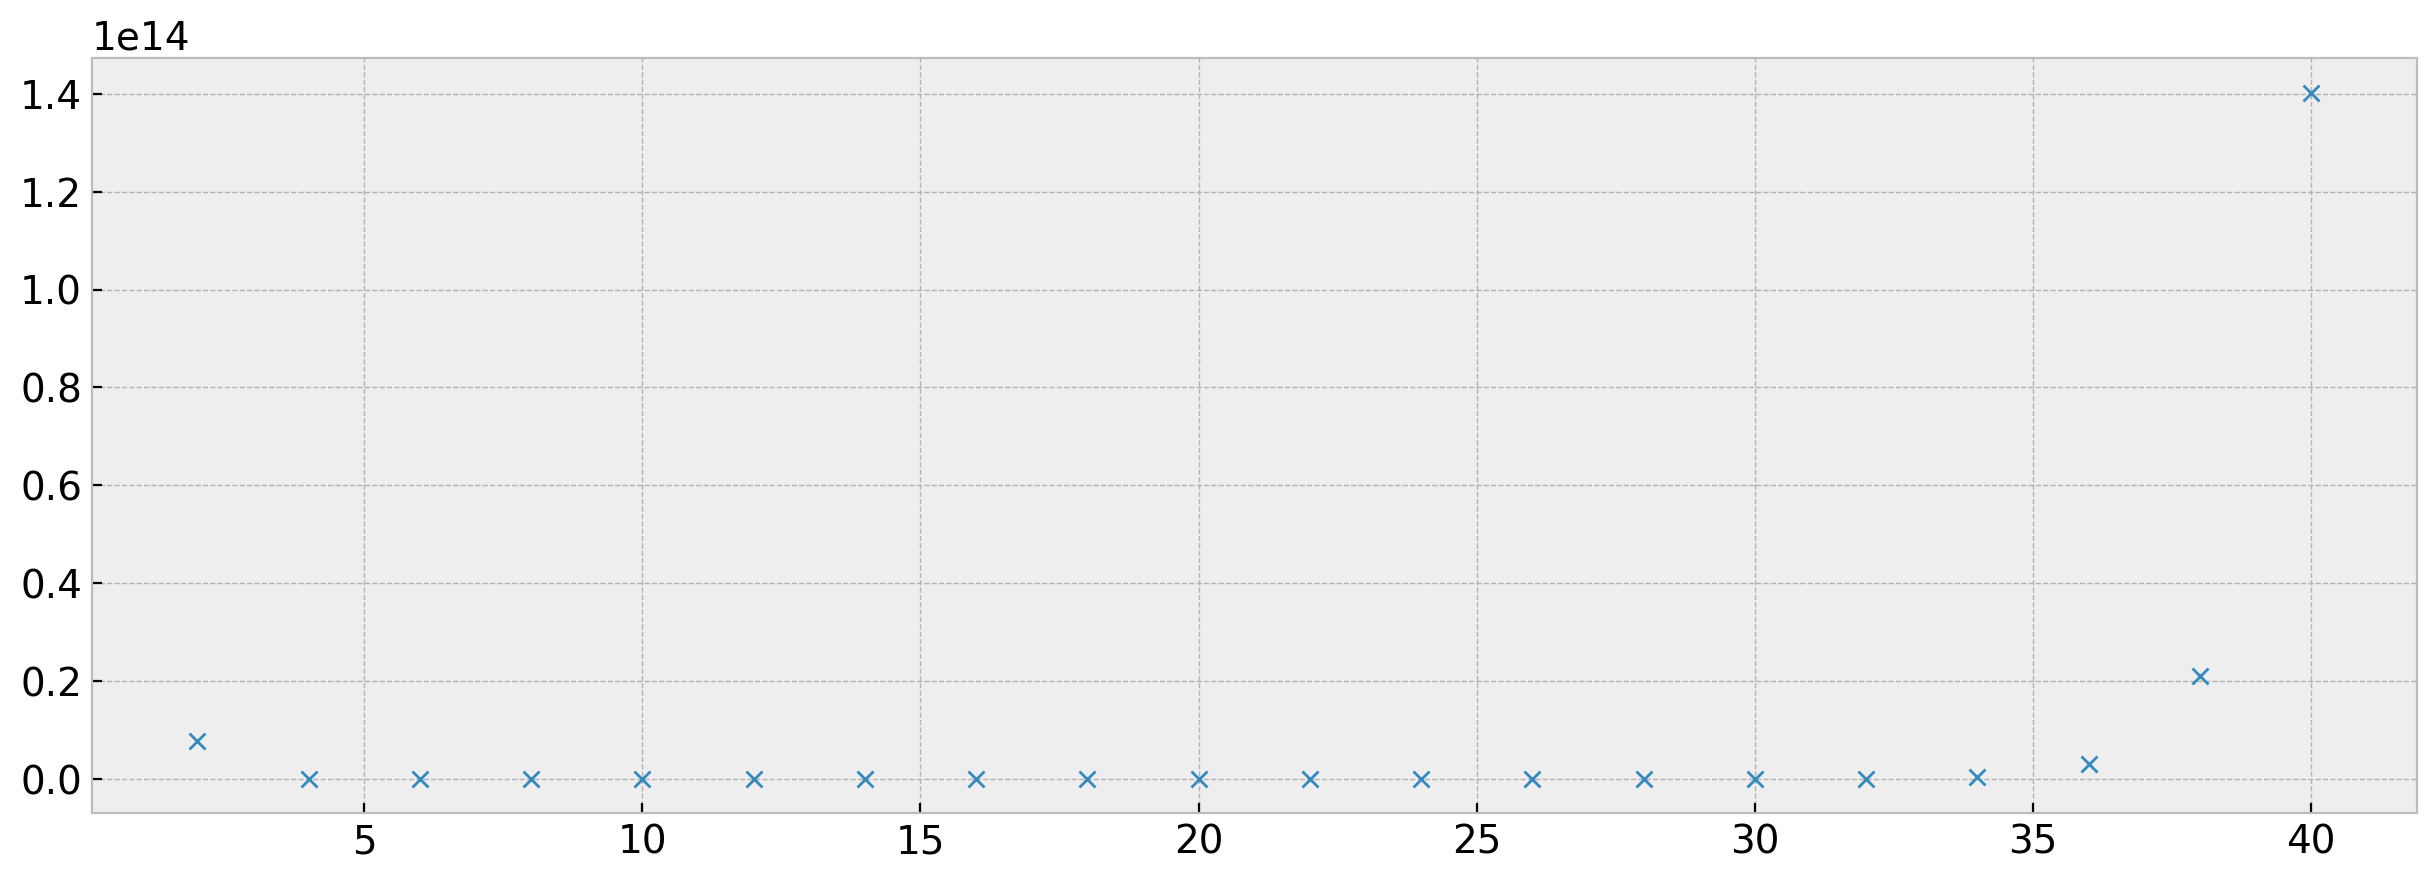

In [4]:
def factorial(n):
        return np.prod(range(1,n+1))

for x in range(2,41,2):
    Ei = np.exp(x)/x * sum([(-1)**n*factorial(n)/x**n for n in range(1,21)])
    plt.plot(x, abs(Ei), "x", c="C0")
plt.show()